# **K - Means - Grouping of Data**

- **Unsupervised**: It does not take into account class information for model assembly. It finds similarities between data and group them by it. The similarity between each point is calculated using a distance function;

- Cluster : Aglomerar, ou trabalho em conjunto de dados/computadores, sendo considerados únicos;

- First Step: Generation of 'k' centroids, where the number of centroids = k;

- Second Step: Calculating distance between all points and centroids. The less distance to centroid will be attribuited to the cluster;

- Third Step: Calculating again our centroids using mean values from data;

- Last Step: Repeting Second and Third steps until our cluster become estatic. Estatic means that no points can change the cluster; 

- **Exclusive Cluster**: Group where each registry belongs to a unique group;
- **Overlapping Cluster**: Group where each registry can belong to more than 1 group or cluster;
- **Hierarchial Cluster**: Group that has a hierarchy between groups. Each registry can be agouping by groups with subgroups with anoter registrys.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


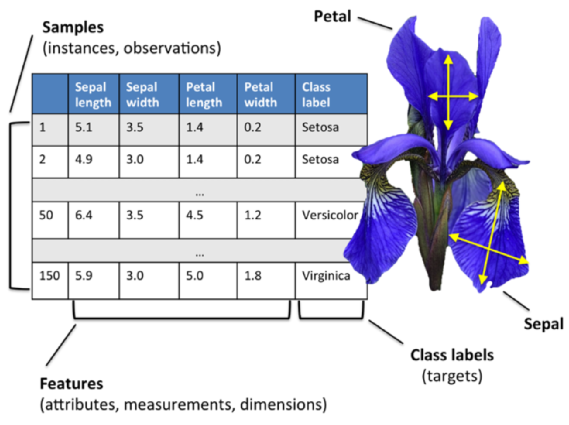

In [ ]:
from IPython.display import Image
Image(filename ="iris-data-set.png", width=500, height=300)

**Separating Data and Class**

In [ ]:
X = iris.drop('Species', axis=1) # Removing 'Species'
X[:10] # Showing 10 first values

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# Attribute y to Species
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### **Categorical Values to Numeric Values**

In [ ]:
# Function to convert each class name
def convert_classe(l):
  if l == 'Iris-virginica':
    return 0
  elif l == 'Iris-setosa':
    return 1
  elif l == 'Iris-versicolor':
    return 2

In [ ]:
# Applying our function and check how many are there
y = y.apply(convert_classe)
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

**Instantiating K-Means with 3 clusters**

In [ ]:
# Creating 3 groups to simulate our classes
kmeans = KMeans(n_clusters=3, init = 'random')

In [ ]:
# Agroup 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

**Centroids**

- Pontos de referencias onde cada amostra será calculada a distancia para especificar qual cluster ela irá;

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

In [ ]:
# We will have the distance for each cluster
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

**Distance for each Cluster**

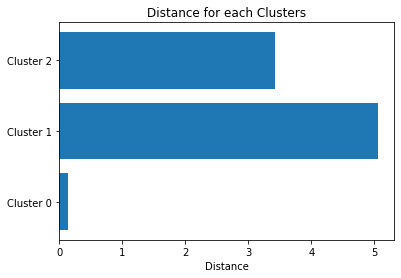

In [ ]:
%matplotlib inline
x = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.barh(x, distance[0]) # checking only the first line, first sample
plt.xlabel('Distance')
plt.title('Distance for each Clusters')
plt.show()

- O ponto com a menor distância entre os 3 é adicionado ao grupo respectivo de sua posição. No caso acima a ordem das classes são 0, 1 e 2. O menor dos 3 valores é 0.14694217, logo ele vai para classe 2 = Iris-versicolor. A linha abaixo mostra isto:

- The point with the shortest distance between the 3 is added to the respective group of its position. In the case above, the order of the classes is 0, 1 and 2. The smallest of the 3 values ​​is 0.14694217, so it goes to class 2 = Iris-versicolor. The line below shows this:

In [ ]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

**Centroids Visualization**

- These are the "mean" points, the central points. The point with the best distance between others points from the group.

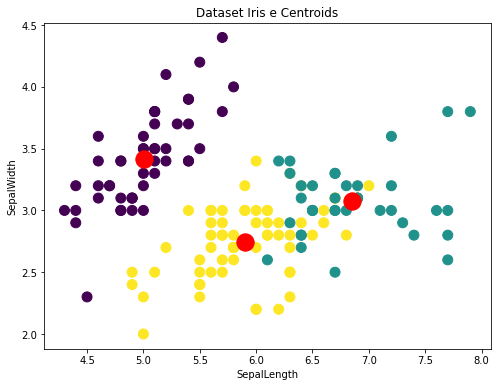

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

**Agrouping new data to test**

In [ ]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([0, 1, 2], dtype=int32)

                    First will to 2, secondo to 1 and third to 0.

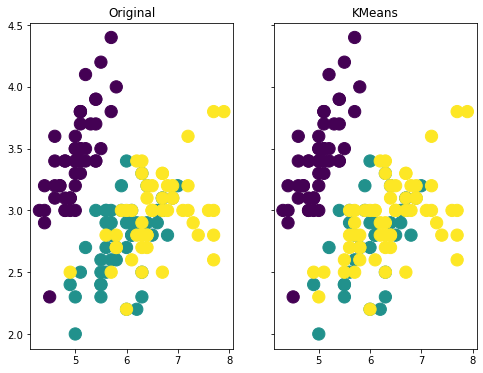

In [ ]:
%matplotlib inline
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

We can see where is the original position from our dataset and next to, how KMeans predicted it.

## **Estimating K parameter - Elbow Method**

- When you don't know which K value use, let's see:

1 680.8244
2 152.36870647733906
3 78.94084142614602
4 57.345409315718165
5 46.53558205128205
6 39.2668215140274
7 35.57915020955174
8 30.228747352211315
9 28.00125
10 26.882686708028814


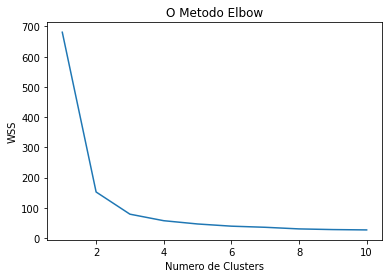

In [ ]:
%matplotlib inline
wcss = []

for i in range(1, 11): # K de 1 a 10
    kmeans2 = KMeans(n_clusters = i, init = 'random') # Instancio
    kmeans2.fit(X) # Agrupamento
    print (i,kmeans2.inertia_) # Somatorio Erros Quadraticos
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

With K= 1 we have the biggest value error. K = 2 we have a decrease value to 152. But since K = 3 we have stability errors value. So it's recommend to use K = 3, like we used.  

**Validations Techniques**

**Confusion Matrix**

In [ ]:
print(pd.crosstab(y, kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0         0  36  14   50
1        50   0   0   50
2         0   2  48   50
All      50  38  62  150


**Classification Metrics**

In [ ]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.00      0.00      0.00        50
   Cluster 1       0.00      0.00      0.00        50
   Cluster 0       0.77      0.96      0.86        50

    accuracy                           0.32       150
   macro avg       0.26      0.32      0.29       150
weighted avg       0.26      0.32      0.29       150

